# House Price Prediction 

In [1]:
import pandas as pd

In [2]:
housing=pd.read_csv('data.csv')

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [5]:
housing['CHAS'].value_counts()

0    476
1     35
Name: CHAS, dtype: int64

In [6]:
%matplotlib inline

In [7]:
import matplotlib as plt

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

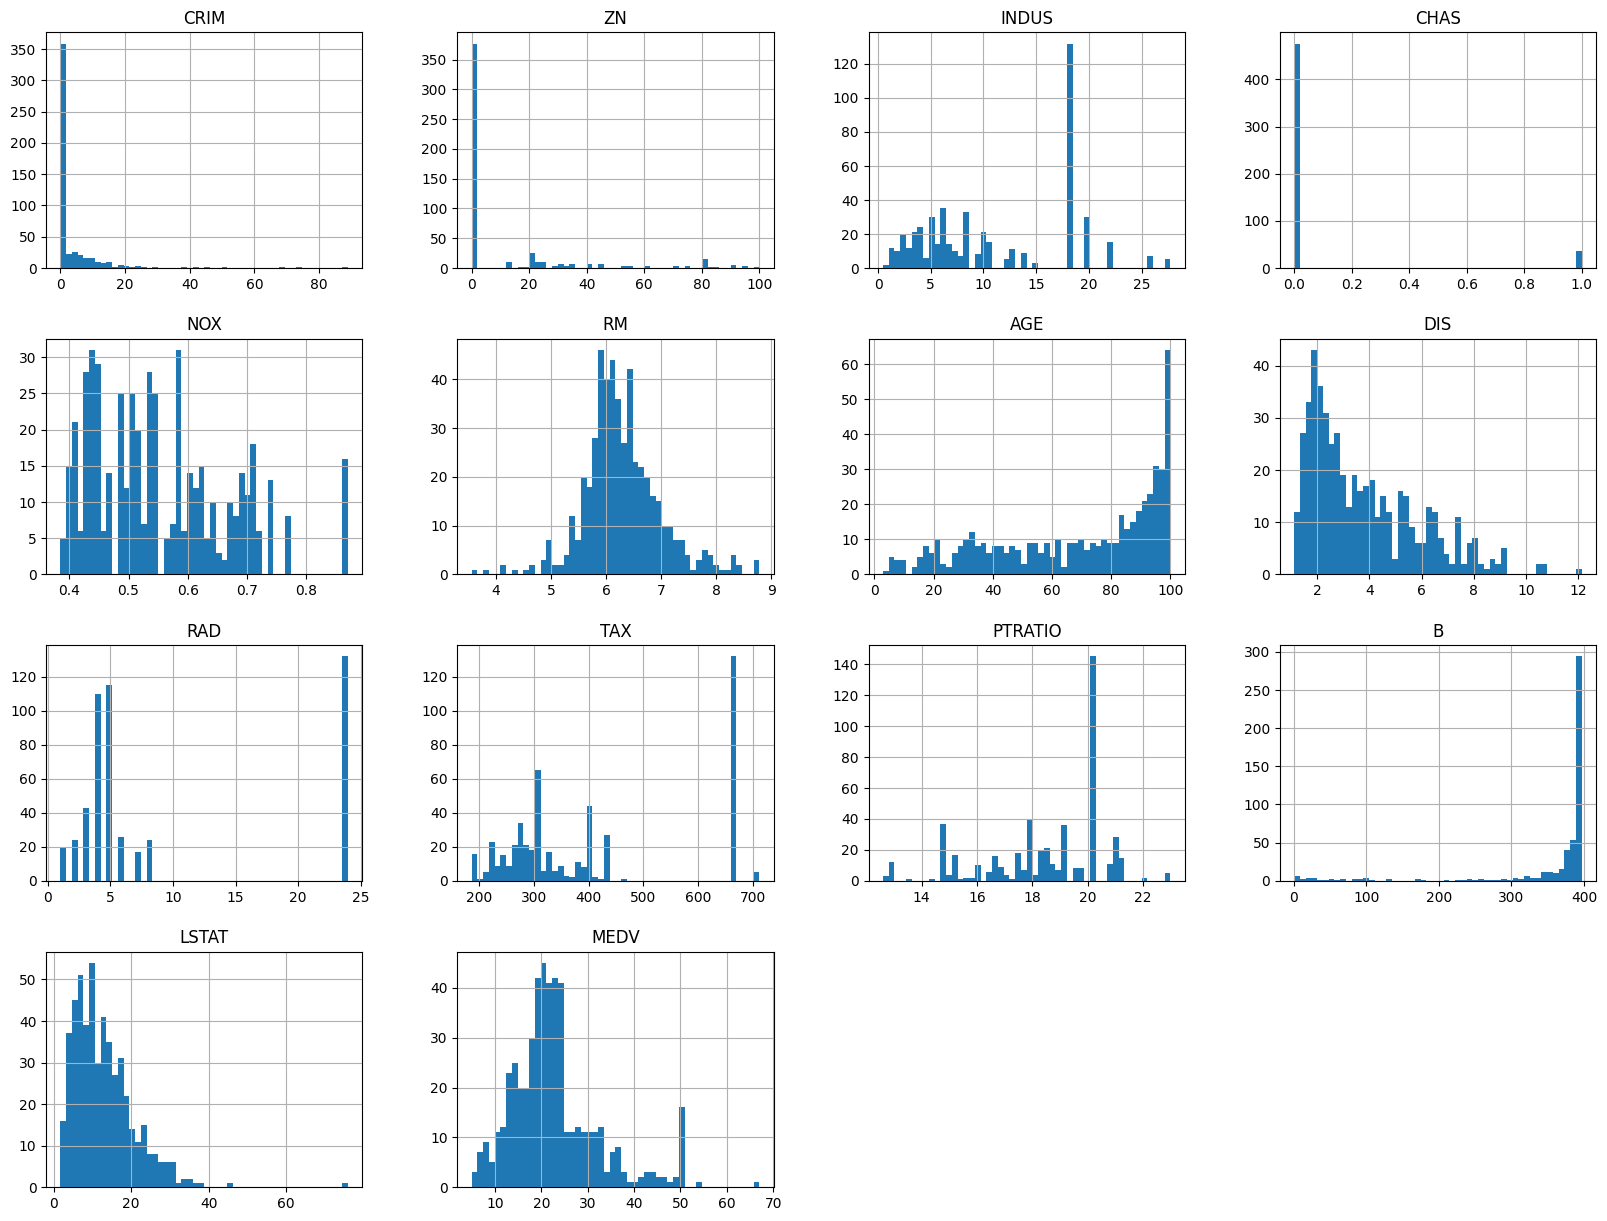

In [8]:
housing.hist(bins=50,figsize=(20,15))

In [9]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)
print(f"Rows in train_set: {len(train_set)},\n Rows in test_set: {len(test_set)}")

Rows in train_set: 408,
 Rows in test_set: 103


In [10]:
from sklearn.model_selection import ShuffleSplit
split=ShuffleSplit(n_splits=5,test_size=0.2,random_state=42)
for train_index,test_index in split.split(housing,housing['CHAS']):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]

In [11]:
strat_train_set['CHAS'].value_counts()

0    382
1     26
Name: CHAS, dtype: int64

In [12]:
strat_test_set['CHAS'].value_counts()

0    94
1     9
Name: CHAS, dtype: int64

In [13]:
housing=strat_train_set.copy()

***lets look at the correlations***

In [14]:
corr_matrix=housing.corr()

In [15]:
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.661148
ZN         0.348521
B          0.314327
DIS        0.248678
CHAS       0.125851
AGE       -0.364986
CRIM      -0.376037
RAD       -0.376416
NOX       -0.416496
PTRATIO   -0.423345
TAX       -0.464353
INDUS     -0.482146
LSTAT     -0.516606
Name: MEDV, dtype: float64

In [16]:
from pandas.plotting import scatter_matrix

array([[<AxesSubplot:xlabel='MEDV', ylabel='MEDV'>,
        <AxesSubplot:xlabel='RM', ylabel='MEDV'>,
        <AxesSubplot:xlabel='ZN', ylabel='MEDV'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='RM'>,
        <AxesSubplot:xlabel='RM', ylabel='RM'>,
        <AxesSubplot:xlabel='ZN', ylabel='RM'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='RM'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='ZN'>,
        <AxesSubplot:xlabel='RM', ylabel='ZN'>,
        <AxesSubplot:xlabel='ZN', ylabel='ZN'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='ZN'>],
       [<AxesSubplot:xlabel='MEDV', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='RM', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='ZN', ylabel='LSTAT'>,
        <AxesSubplot:xlabel='LSTAT', ylabel='LSTAT'>]], dtype=object)

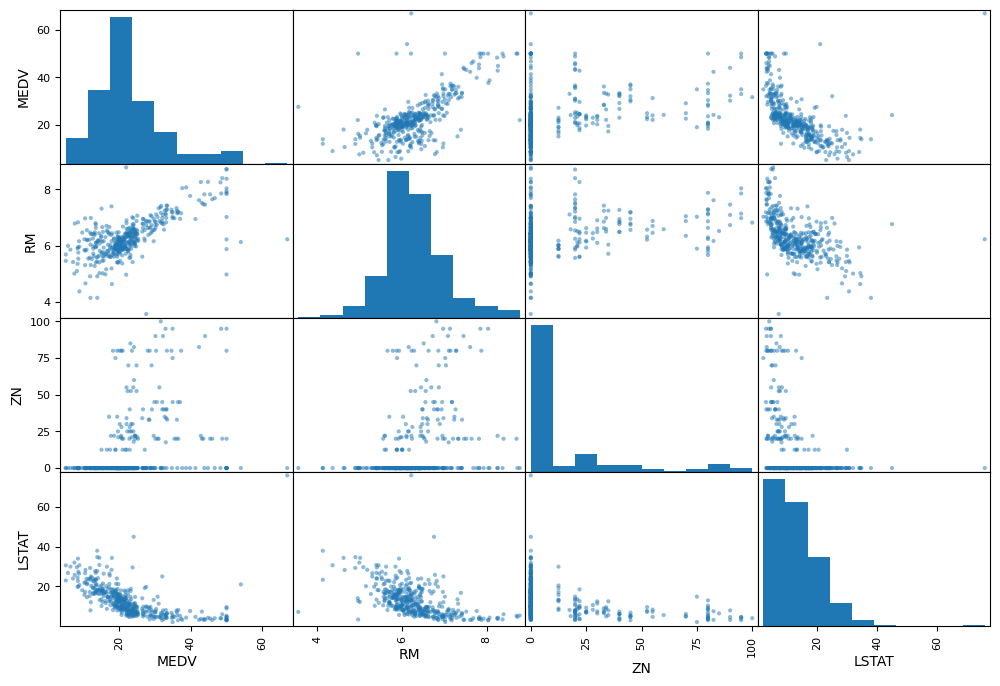

In [17]:
attributes=["MEDV","RM","ZN","LSTAT"]
scatter_matrix(housing[attributes],figsize=(12,8))

In [18]:
housing=strat_train_set.drop("MEDV",axis=1)
housing_labels=strat_train_set["MEDV"].copy()

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
my_pipeline=Pipeline([
    ('imputer',SimpleImputer(strategy='median')),
    ('std_scaler',StandardScaler())
])

In [20]:
housing_num_tr=my_pipeline.fit_transform(housing)


In [21]:
housing_num_tr.shape

(408, 13)

****Now selecting a desired model****

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model=LinearRegression()
#model=DecisionTreeRegressor()
model=RandomForestRegressor()
model.fit(housing_num_tr,housing_labels)

RandomForestRegressor()

In [23]:
some_data=housing.iloc[:5]

In [24]:
some_labels=housing_labels.iloc[:5]

In [25]:
prepared_data=my_pipeline.transform(some_data)

In [26]:
model.predict(prepared_data)

array([19.911, 20.55 , 33.779, 48.437, 24.6  ])

In [27]:
some_labels

462    19.5
355    20.6
200    32.9
203    48.5
239    23.3
Name: MEDV, dtype: float64

***Evaluating the model***

In [28]:
from sklearn.metrics import mean_squared_error
import numpy as np
housing_predictions=model.predict(housing_num_tr)
mse=mean_squared_error(housing_labels,housing_predictions)
rmse=np.sqrt(mse)

In [29]:
mse

2.3062109705882357

In [30]:
rmse

1.518621404625997

****using better evaluation technique-cross validation****

In [31]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,housing_num_tr,housing_labels,scoring="neg_mean_squared_error",cv=10)
rmse_scores=np.sqrt(-scores)

In [32]:
rmse_scores

array([5.72913889, 3.03424833, 4.87524227, 1.99269189, 3.15113217,
       4.29294528, 7.48602637, 5.16051486, 4.0959888 , 4.02978779])

In [33]:
def print_score(scores):
    print("score: ",scores)
    print("Mean: ",scores.mean())
    print("Standard deviation",scores.std())

In [34]:
print_score(rmse_scores)

score:  [5.72913889 3.03424833 4.87524227 1.99269189 3.15113217 4.29294528
 7.48602637 5.16051486 4.0959888  4.02978779]
Mean:  4.38477166463381
Standard deviation 1.468097728832281


In [35]:
from joblib import dump,load
dump(model,'project1.joblib')

['project1.joblib']

**Testing the model on test data**

In [36]:
x_test=strat_test_set.drop("MEDV",axis=1)
Y_test=strat_test_set["MEDV"].copy()
x_test_prepared=my_pipeline.transform(x_test)
final_predictions=model.predict(x_test_prepared)
final_mse=mean_squared_error(Y_test,final_predictions)
final_rmse=np.sqrt(final_mse)

In [37]:
final_mse

7.993478941747576

In [38]:
final_rmse

2.8272741186074577

In [39]:
prepared_data[0]

array([ 0.32870498, -0.49487059,  1.0190403 , -0.26088853,  1.34662496,
        0.03375891,  0.50978869, -0.50178113,  1.70950833,  1.56061459,
        0.77102021,  0.4304776 ,  0.13203053])

**using the model**

In [40]:
from joblib import dump,load
import numpy as np
model=load('project1.joblib')
input=np.array([[ 0.32870498, -0.49487059,  1.0190403 , -0.26088853,  1.34662496,
        0.03375891,  0.50978869, -0.50178113,  1.70950833,  1.56061459,
        0.77102021,  0.4304776 ,  0.13203053]])
model.predict(input)

array([19.911])